In [1]:
# Asegúrate de que la ruta al archivo sea correcta
include("ClusterProperties.jl")
using .ClusterPhysicsModule

# Define los parámetros para Chromium
params = Dict(
    "temperature" => 750,
    "activation_energy" => 52920.2,  # Convertir a joules si es necesario
    "diffusivity_factor" => 2e-9,
    "jump_distance" => 4.6e-10,
    "molar_mass" => 150.05*1e-3,
    "mass_density" => 2500,
    "melting_point" => 1300,
    "heat_fusion" => 52 * 1e3,  # Asegurarse de que las unidades sean consistentes
    "sigma" => 0.15,
    "supersaturation_ratio" => 1.1,
    "method" => "melting"
)



Módulo ClusterPhysics cargado sin usar Unitful.


Dict{String, Any} with 11 entries:
  "method"                => "melting"
  "mass_density"          => 2500
  "temperature"           => 750
  "sigma"                 => 0.15
  "diffusivity_factor"    => 2.0e-9
  "supersaturation_ratio" => 1.1
  "melting_point"         => 1300
  "heat_fusion"           => 52000.0
  "molar_mass"            => 0.15005
  "jump_distance"         => 4.6e-10
  "activation_energy"     => 52920.2

In [1]:
include("dynamics.jl") # Si guardaste el código en un archivo separado.

Módulo ClusterPhysics cargado sin usar Unitful.


simulate (generic function with 1 method)

In [19]:
MAX_NUMBER_MOLECULES = 10000
number_clusters_start = 2
#dt = 1e-8/unbiased_jump_rate(cluster_physics)
dt = 1e19

1.0e19

In [20]:
params = Dict(
    "temperature" => 750,
    "activation_energy" => 52920.2,  # Convertir a joules si es necesario
    "diffusivity_factor" => 2e-9,
    "jump_distance" => 4.6e-10,
    "molar_mass" => 150.05*1e-3,
    "mass_density" => 2500,
    "melting_point" => 1300,
    "heat_fusion" => 52 * 1e3,  # Asegurarse de que las unidades sean consistentes
    "sigma" => 0.15,
    "supersaturation_ratio" => 1.1,
    "method" => "melting"
)


dn = JuliaClusterDynamics(params, 1e5, dt, number_clusters_start, MAX_NUMBER_MOLECULES, "closed")

JuliaClusterDynamics(ClusterPhysics(750.0, 52920.2, 2.0e-9, 4.6e-10, 0.15005000000000002, 2500.0, 1300.0, 52000.0, 0.15, 1.1, "melting"), 100000, 1.0e19, 2, 10000, "closed", [6.022140759999999e23, 2.953433514966514e21, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999, 10000], [1.194014068060294e-19, 1.74464911980178e-19, 2.1475868623921582e-19, 2.4679977122848196e-19, 2.7329233920233634e-19, 2.956891440848516e-19, 3.148844753502672e-19, 3.3147818931281905e-19, 3.458973235831358e-19, 3.584595127936586e-19  …  -2.9265543048881967e-16, -2.926871357930011e-16, -2.927188412581939e-16, -2.9275054688437647e-16, -2.927822526715274e-16, -2.9281395861962525e-16, -2.928456647286484e-16, -2.9287737099857555e-16, -2.9290907742938514e-16, -2.9294078402105585e-16], [3.606444617296477e-21, 1.1681410208947375e-20, 2.2800945695615958e-20, 3.6107780277923236e-20, 5.10620046

In [21]:
# Llama a simulate! para ejecutar la simulación y almacenar la solución
@time solution = simulate(dn; method=Rodas5P(), rtol=1e-6, atol=1e-6);
println("La simulación fue exitosa: ", solution.retcode)
println("El tiempo final de la simulación fue: ", solution.t[end])

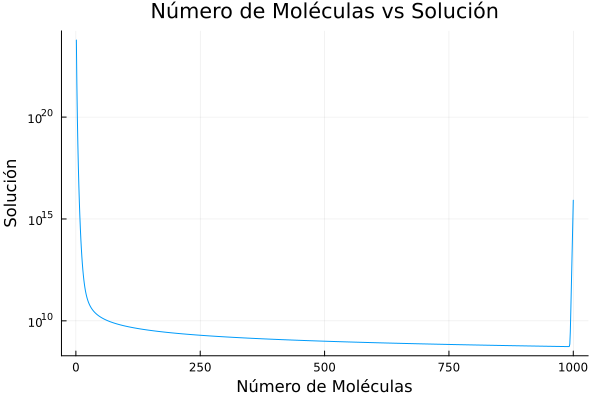

In [18]:
using Plots
number_molecules_array = collect(1:MAX_NUMBER_MOLECULES)
# Suponiendo que `y_final` es tu solución final y `number_molecules_array` contiene el número de moléculas correspondiente
plot(number_molecules_array, solution[:,end], yscale=:log10,
    xlabel="Número de Moléculas", ylabel="Solución",
    title="Número de Moléculas vs Solución",
    legend=false)

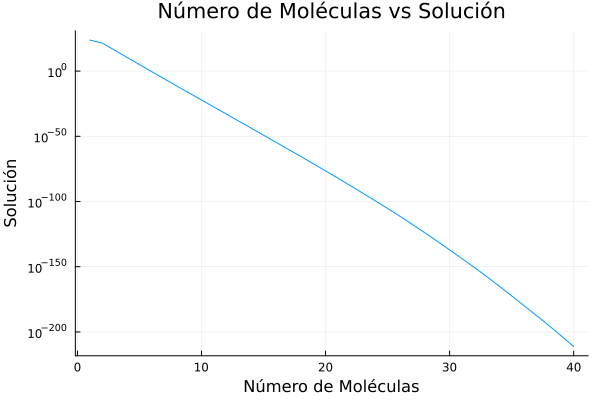

In [13]:
plot(number_molecules_array, solution[:, end], yscale=:log10,
    xlabel="Número de Moléculas", ylabel="Solución",
    title="Número de Moléculas vs Solución",
    legend=false)

plot(number_molecules_array, solution[:, 20], yscale=:log10,
    xlabel="Número de Moléculas", ylabel="Solución",
    title="Número de Moléculas vs Solución",
    legend=false)